Focusing on NetworkX

<br>

# Preliminaries

## Libraries

In [1]:
import os
import pathlib
import sys

import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

<br>
<br>

# NetworkX: Vertices, Edges, & Connected Components

In [2]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (3, 5), (4, 6), (6, 9), (8, 9), (11, 11)])

<br>

The nodes, and the number of nodes.

In [3]:
print(f'The nodes: {list(G.nodes)}')

The nodes: [1, 2, 3, 5, 4, 6, 9, 8, 11]


In [4]:
print(f'# of nodes: {G.number_of_nodes()}')

# of nodes: 9


<br>

The edges, ad the number of edges

In [5]:
print(f'The edges: {list(G.edges)}')

The edges: [(1, 2), (1, 3), (3, 5), (4, 6), (6, 9), (9, 8), (11, 11)]


In [6]:
print(f'# of edges: {G.number_of_edges()}')

# of edges: 7


<br>

The connected components

The connected components: [{1, 2, 3, 5}, {8, 9, 4, 6}, {11}]


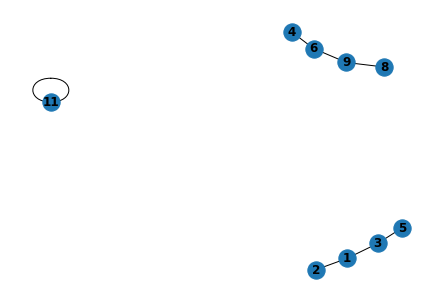

In [7]:
print(f'The connected components: {list(nx.connected_components(G))}')

nx.draw(G, with_labels=True, font_weight='bold')

<br>
<br>

# Determining Equivalent Geographic Points

A key set of issues, in relation to site identification codes of the ESPEN data sets, are

* Survey sites that have the same co&ouml;rdinate values have different site identification codes.

* Survey sites whose longitude or latitude values differ by fractions of a point, e.g., <br>

longitude | latitude
:--- | :---
33.87212 | -2.031722
33.872115 | -2.0317217

&nbsp; &nbsp; &nbsp; &nbsp; can have different site identification codes.

* Many observations do not have a site identification code.

The aim herein is to determine which co&ouml;rdinate points are more or less equivalent, and subsequently generate identification codes.  [At present](https://github.com/helminthiases/infections/blob/develop/src/networks/adjacency.py#L66), if $\lfloor \text{linear distance} \rfloor = 0$ between an observation point and its nearest point, then the points are equivalent.  The co&ouml;rdinates undergo [EPSG:3587](https://epsg.io/3857) transformation prior to distance calculations, hence the distance unit of meausre is metres.  



<br>

Each observation within the data sets of [helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/linear](https://github.com/helminthiases/infections/tree/develop/warehouse/data/ESPEN/networks/linear) includes the variables `src` & `dst`.  `src` is a *temporary observation identifier*, whilst `dst` is the *temporary observation identifier* of the nearest observation

$$
\textit{dst identifier} =
\begin{cases}
\textit{nearest observation identifier}, & \text{if } \lfloor\text{linear distance}\rfloor = 0 \\
\textit{src identifier}, & \text{if } \lfloor\text{linear distance}\rfloor > 0
\end{cases}
$$

Wherein **linear distance** is the distance between an observation and its nearest observation. 

<br>
<br>

## Points & Lines

If the entire [helminthiases hub](https://github.com/helminthiases) is available locally, then the data files in question will be available within

> `os.path.join(hub, 'infections', 'warehouse', 'data', 'ESPEN', 'networks', 'linear')`


In [8]:
parent = str(pathlib.Path(os.getcwd()).parent)
hub = os.path.dirname(parent)
os.path.basename(hub)

'helminthiases'

<br>

An experiments data set

In [9]:
url = 'https://raw.githubusercontent.com/helminthiases/infections/develop/warehouse/data/ESPEN/networks/linear/TZ.csv'
url

'https://raw.githubusercontent.com/helminthiases/infections/develop/warehouse/data/ESPEN/networks/linear/TZ.csv'

<br>

Reading-in

In [10]:
frame = pd.read_csv(filepath_or_buffer=url, header=0, encoding='utf-8')
frame.columns

Index(['iso3', 'iso2', 'admin1_id', 'admin2_id', 'iu_id', 'location',
       'site_id', 'longitude', 'latitude', 'georeliability', 'location_type',
       'survey_type', 'year', 'age_start', 'age_end', 'hk_examined',
       'hk_positive', 'hk_perc_highinfection', 'hk_perc_moderateinfection',
       'asc_examined', 'asc_positive', 'asc_perc_highinfection',
       'asc_perc_moderateinfection', 'tt_examined', 'tt_positive',
       'tt_perc_highinfection', 'tt_perc_moderateinfection', 'quality', 'sn',
       'geometry', 'shortest', 'id', 'src', 'dst'],
      dtype='object')

In [11]:
excerpt = frame[['longitude', 'latitude', 'georeliability', 'shortest', 'id', 'src', 'dst']]
excerpt.head(9)

,longitude,latitude,georeliability,shortest,id,src,dst
0,34.284892,-1.387712,3,4366.461723,0,0,0
1,32.078701,-5.079600,3,8973.961518,1,1,1
2,33.804762,-1.501682,3,0.192169,2,2,397
3,33.650000,-2.466667,1,6339.104344,3,3,3
4,29.619103,-4.898798,3,0.000000,4,4,5
5,29.619103,-4.898798,3,0.000000,5,5,4
6,29.619103,-4.898798,3,0.000000,6,6,4
7,39.799000,-7.850000,3,14422.968995,7,7,7
8,33.872120,-2.031722,3,0.557600,8,8,9


<br>
<br>

## Networks

In [12]:
connections = nx.from_pandas_edgelist(excerpt, source='src', target='dst')

<br>

Note:

* Nodes: `connections.nodes`
* Edges: `connections.edges`

In [13]:
list(connections.edges)[:9]

[(0, 0), (1, 1), (2, 397), (397, 398), (3, 3), (4, 5), (4, 6), (7, 7), (8, 9)]

<br>

**Connected Components**: Considering the data & edges previews above, it is expected that

* 4, 5, and 6 will belong to the same connected component
* 2, 397, and 398 will belong to the same connected component
* etc.



In [14]:
components = list(nx.connected_components(connections))

In [15]:
components

[{0},
 {1},
 {2, 397, 398},
 {3},
 {4, 5, 6},
 {7},
 {8, 9},
 {10},
 {11, 657},
 {12, 1008},
 {13},
 {14},
 {15, 47, 48},
 {16},
 {17, 18, 19, 847},
 {20},
 {21, 975, 976},
 {22, 520, 521},
 {23, 877},
 {24, 25, 49},
 {26},
 {27},
 {28},
 {29},
 {30},
 {31},
 {32},
 {33, 34, 35},
 {36, 796, 797},
 {37},
 {38},
 {39, 40, 41, 277},
 {42, 43, 648},
 {44},
 {45, 46},
 {50},
 {51, 52, 381},
 {53, 350, 351},
 {54, 512},
 {55, 56, 509},
 {57},
 {58},
 {59, 60, 626, 627},
 {61},
 {62, 107},
 {63},
 {64, 891},
 {65},
 {66},
 {67, 68, 117},
 {69},
 {70},
 {71, 72, 108},
 {73},
 {74},
 {75, 76, 402},
 {77, 160},
 {78, 79, 577},
 {80},
 {81},
 {82, 83, 84},
 {85},
 {86},
 {87},
 {88, 89, 121},
 {90},
 {91},
 {92, 168, 169},
 {93, 94, 459},
 {95, 96, 97, 221},
 {98, 870},
 {99},
 {100},
 {101},
 {102},
 {103},
 {104, 105},
 {106, 842, 843},
 {109, 110, 111},
 {112, 438},
 {113},
 {114},
 {115, 116, 120},
 {118, 119, 338},
 {122, 123},
 {124, 125, 126},
 {127},
 {128, 129},
 {130, 131, 436},
 {132, 

<br>
<br>

## Generating Identification Codes

In [16]:
type(components)

list

In [62]:
sample = pd.DataFrame(data = {'component': components})

In [63]:
sample.loc[:, 'identifier'] = np.linspace(start=1, stop=sample.shape[0], num=sample.shape[0], endpoint=True, dtype=np.int64)

In [64]:
sample = sample.explode(column='component', ignore_index=True)

In [65]:
sample.loc[:, 'component'] = sample['component'].astype(np.int64, errors='raise').values

In [66]:
sample.head()

,component,identifier
0,0,1
1,1,2
2,2,3
3,397,3
4,398,3


<br>
<br>

## Join/Merge

In [67]:
sample.rename(columns={'component': 'id'}, inplace=True)

In [68]:
sample.head()

,id,identifier
0,0,1
1,1,2
2,2,3
3,397,3
4,398,3


In [69]:
excerpt.merge(sample, on='id', how='left').head(23)

,longitude,latitude,georeliability,shortest,id,src,dst,identifier
0,34.284892,-1.387712,3,4366.461723,0,0,0,1
1,32.078701,-5.079600,3,8973.961518,1,1,1,2
2,33.804762,-1.501682,3,0.192169,2,2,397,3
3,33.650000,-2.466667,1,6339.104344,3,3,3,4
4,29.619103,-4.898798,3,0.000000,4,4,5,5
5,29.619103,-4.898798,3,0.000000,5,5,4,5
6,29.619103,-4.898798,3,0.000000,6,6,4,5
7,39.799000,-7.850000,3,14422.968995,7,7,7,6
8,33.872120,-2.031722,3,0.557600,8,8,9,7
9,33.872115,-2.031722,3,0.557600,9,9,8,7


In [73]:
focus = frame.merge(sample, on='id', how='left')

In [74]:
focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 0 to 1059
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso3                        1060 non-null   object 
 1   iso2                        1060 non-null   object 
 2   admin1_id                   1060 non-null   float64
 3   admin2_id                   1060 non-null   float64
 4   iu_id                       1060 non-null   float64
 5   location                    1060 non-null   object 
 6   site_id                     349 non-null    float64
 7   longitude                   1060 non-null   float64
 8   latitude                    1060 non-null   float64
 9   georeliability              1060 non-null   int64  
 10  location_type               707 non-null    object 
 11  survey_type                 707 non-null    object 
 12  year                        1060 non-null   float64
 13  age_start                   450 n